In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install glob2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from tqdm.notebook import tqdm
from glob import glob


def get_contenct(patient_folder_adrs,d=0):
  if d == 0:
    folder_adrs = sorted(glob(patient_folder_adrs+"/*"))[0]
    type_of = "post"
  else:
    folder_adrs = sorted(glob(patient_folder_adrs+"/*"))[1]
    type_of = "pre"

  op_type = os.path.basename(os.path.normpath(folder_adrs))

  for i in sorted(glob(folder_adrs+"/*")):
    h = os.path.basename(os.path.normpath(i)).split("_")
    patient_id = h[0]
    if h[1] == "heartrate" and h[2] == "seconds":
      break
  return i,patient_id,type_of

In [6]:
from glob import glob
import os

path = "/content/drive/MyDrive/Iqram Sir/Fitabase data pulls - seperate"

In [7]:


g= sorted(glob(path+"/*"))[0]

add,pid,state = get_contenct(g,1)
print(add)
print(pid)
print(state)

/content/drive/MyDrive/Iqram Sir/Fitabase data pulls - seperate/001-JV/001 Pre-op/001-JV_heartrate_seconds_20211202_20221216.csv
001-JV
pre


In [8]:
import pandas as pd
df = pd.read_csv(add)

In [9]:
time = []
hr = []
rr = []

for i in tqdm(range(df.shape[0])):
  time.append(df["Time"][i])
  hr.append(df["Value"][i])
  rr.append(60/df["Value"][i])

d = {
    "Time" : time,
     "HR"  : hr,
     "RR"  : rr
}

df2 = pd.DataFrame(d)

  0%|          | 0/350946 [00:00<?, ?it/s]

In [10]:
!pip install pyhrv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spectrum: filename=spectrum-0.8.1-cp310-cp310-linux_x86_64.whl size=237789 sha256=3ba9f2f21e8b703f2e7e315b20b490d625ff54eea56df3e38fbafc3ba577218a
  Stored in directory: /root/.cache/pip/wheels/e7/5a/09/ffc6afdf8a5a6f58e9851292108df32bb11374e11b8705cabd
  Created wheel for easydev: filename=easydev-0.12.1-py3-none-any.whl size=64214 sha256=d245dfa234875409d149260b9b1523bd9213c008b4d573192404ee32df3cd653
  Stored in directory: /root/.cache/pip/wheels/c5/a3/df/e8e19f6f1674c2b

In [11]:
nni = df2["RR"]

/usr/local/lib/python3.10/dist-packages/pyhrv/time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


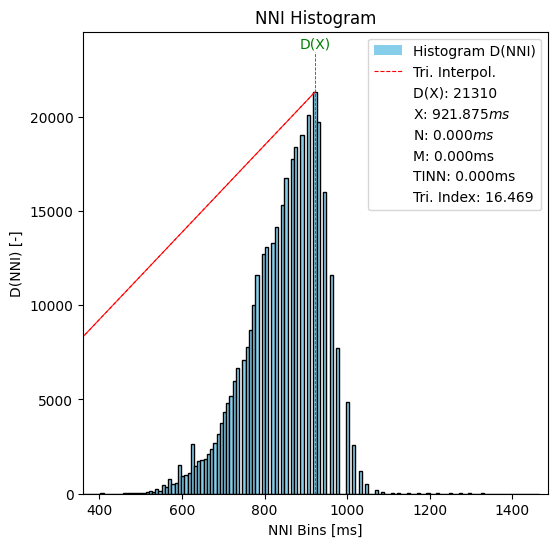

In [12]:
# Import packages
import biosppy
import pyhrv.time_domain as td
import pyhrv.tools as tools


nni_results_td = td.time_domain(nni=nni)

In [13]:
nni_results_td

ReturnTuple(nni_counter=350946, nni_mean=840.803132105794, nni_min=384.0, nni_max=1463.0, hr_mean=72.41625613540528, hr_min=41.01161995898838, hr_max=156.25, hr_std=9.276409357931561, nni_diff_mean=10.595096097679123, nni_diff_min=0, nni_diff_max=389, sdnn=97.23349747288113, sdnn_index=44.774174511458156, sdann=81.32464084662483, rmssd=16.412439626706256, sdsd=12.534454948880143, nn50=4429, pnn50=1.2620211144196383, nn20=47577, pnn20=13.55682514354101, nni_histogram=<Figure size 600x600 with 1 Axes>, tinn_n=0, tinn_m=0, tinn=0, tri_index=16.46860628812764)

In [14]:

dic_td = {'nni_counter': [],
 'nni_mean': [],
 'nni_min': [],
 'nni_max': [],
 'hr_mean': [],
 'hr_min': [],
 'hr_max': [],
 'hr_std': [],
 'nni_diff_mean': [],
 'nni_diff_min': [],
 'nni_diff_max': [],
 'sdnn': [],
 'sdnn_index': [],
 'sdann': [],
 'rmssd': [],
 'sdsd': [],
 'nn50': [],
 'pnn50': [],
 'nn20': [],
 'pnn20': [],
 'tinn_n': [],
 'tinn_m': [],
 'tinn': [],
 'tri_index': []}

#Frequency Domain Module

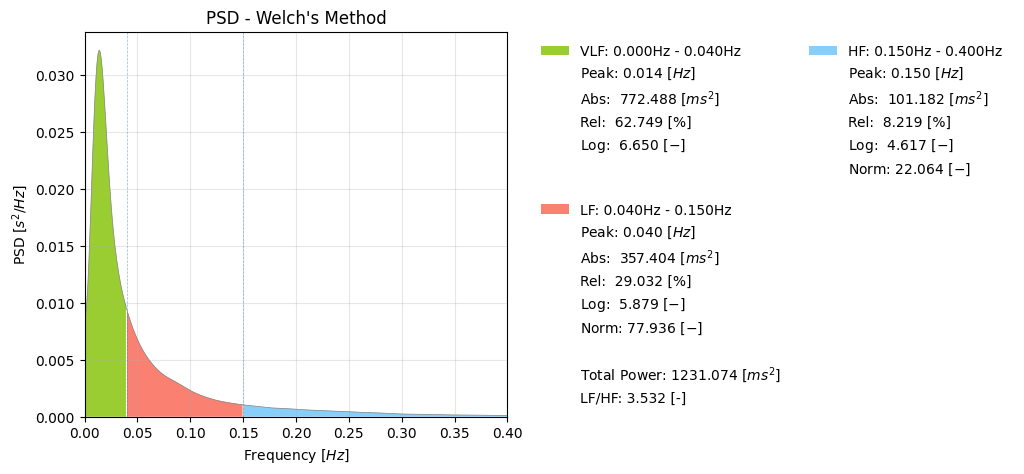

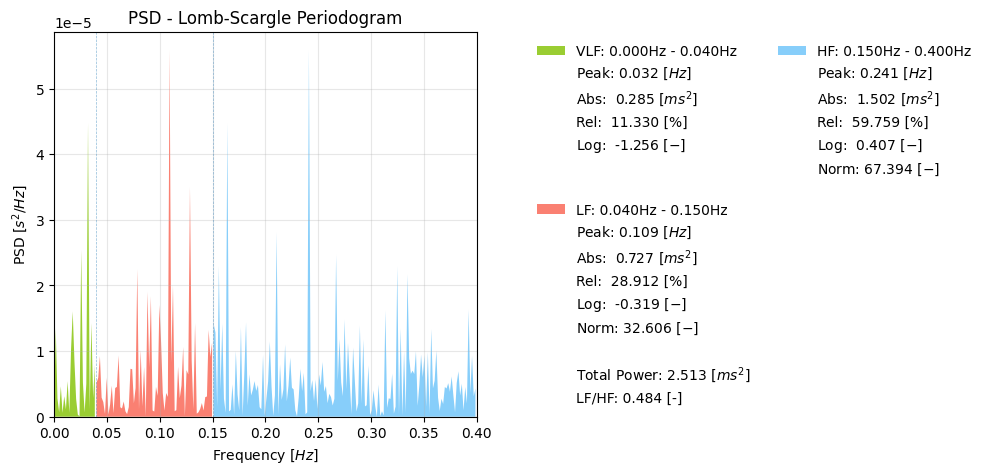

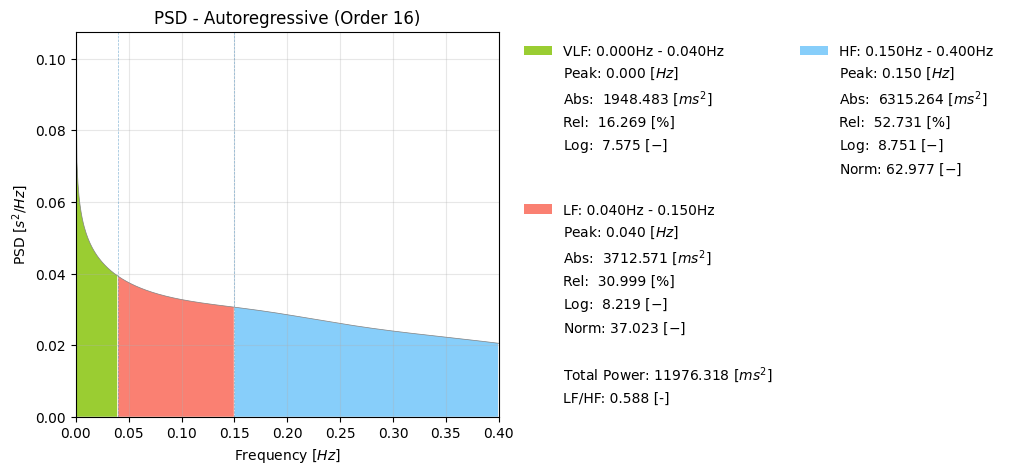

In [15]:
# Import packages
import biosppy
import pyhrv.frequency_domain as fd
import pyhrv.tools as tools

nni_results_fd = fd.frequency_domain(nni=nni)

In [16]:
nni_results_fd

ReturnTuple(fft_bands=ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4)), fft_peak=(0.013671875, 0.0400390625, 0.150390625), fft_abs=(772.4878611668571, 357.40365010715215, 101.18247720832358), fft_rel=(62.74910106086959, 29.031857829094342, 8.219041110036065), fft_log=(6.6496162949485775, 5.87886581561988, 4.616925591745773), fft_norm=(77.9359925690214, 22.064007430978606), fft_ratio=3.53226823426449, fft_total=1231.0739884823329, fft_plot=<Figure size 1200x500 with 2 Axes>, fft_nfft=4096, fft_window='hamming', fft_resampling_frequency=4, fft_interpolation='cubic', lomb_bands=ReturnTuple(ulf=None, vlf=(0.0, 0.04), lf=(0.04, 0.15), hf=(0.15, 0.4)), lomb_peak=(0.03215686274509804, 0.10933333333333334, 0.2411764705882353), lomb_abs=(0.2847457759700602, 0.7266367283710354, 1.5019219556697496), lomb_rel=(11.329537686366557, 28.911607802896267, 59.75885451073718), lomb_log=(-1.2561585109349864, -0.3193286122052351, 0.4067455917188252), lomb_norm=(32.605680683871874, 67.

In [17]:
dic_fd = {'fft_bands': [],
 'vlf': [],
 'lf': [],
 'hf': [],
 'fft_peak': [],
 'fft_abs': [],
 'fft_rel': [],
 'fft_log': [],
 'fft_norm': [],
 'fft_ratio': [],
 'fft_total': [],
 'fft_plot': [],
 'fft_nfft': [],
 'fft_window': [],
 'fft_resampling_frequency': [],
 'fft_interpolation': [],
 'lomb_bands': [],
 'lomb_peak': [],
 'lomb_abs': [],
 'lomb_rel': [],
 'lomb_log': [],
 'lomb_norm': [],
 'lomb_ratio': [],
 'lomb_total': [],
 'lomb_plot': [],
 'lomb_nfft': [],
 'lomb_ma': [],
 'ar_bands': [],
 'ar_peak': [],
 'ar_abs': [],
 'ar_rel': [],
 'ar_log': [],
 'ar_norm': [],
 'ar_ratio': [],
 'ar_total': [],
 'ar_nfft': [],
 'ar_order': [],
 'ar_resampling_frequency': [],
 'ar_interpolation': [],
 'ar_plot': []}

#Nonlinear Module

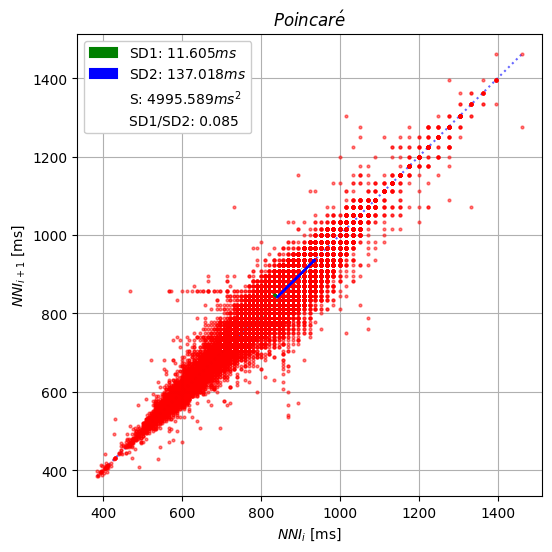

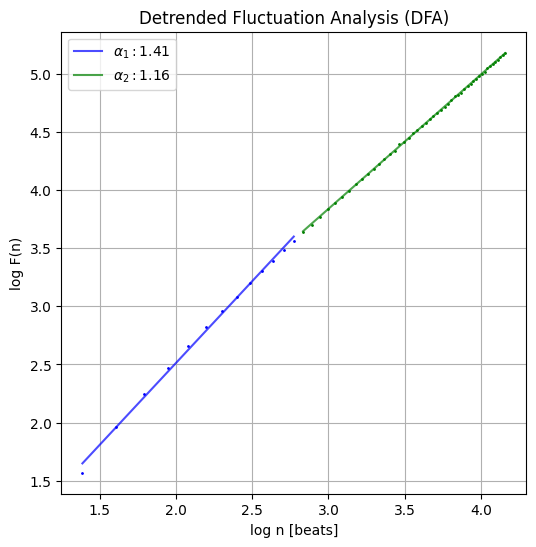

In [ ]:
# Import packages
import biosppy
import pyhrv.nonlinear as nl
import pyhrv.tools as tools

nni_results_nl = nl.nonlinear(nni=nni)

In [ ]:
nni_results_nl

ReturnTuple(poincare_plot=<Figure size 600x600 with 1 Axes>, sd1=11.605347355858802, sd2=137.01832169210974, sd_ratio=11.806481744205433, ellipse_area=4995.588532979444, sampen=0.4646592927109122, dfa_plot=<Figure size 600x600 with 1 Axes>, dfa_alpha1=1.406610415562086, dfa_alpha2=1.1553288886582047, dfa_alpha1_beats=range(4, 17), dfa_alpha2_beats=range(17, 65))

In [ ]:
dic_nl = {'sd1': [],
 'sd2': [],
 'sd_ratio': [],
 'ellipse_area': [],
 'sampen': [],
 'dfa_alpha1': [],
 'dfa_alpha2': [],
 }